In [1]:
from collections import OrderedDict
import matplotlib as mpl
import matplotlib.colors 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.optimize as spopt
import scipy.stats as spstats

import populationevolution_v5 as popev

np.random.seed(42)
plt.style.use(('C:\\Users\\Nicholas Sherer\\.matplotlib\\Sherer_Thesis.mplstyle'))
%matplotlib inline

In [2]:
drift_runs = OrderedDict()
Ks = [200, 400, 800, 1600, 3200, 6400, 12800, 25600]
for K in Ks:
    file = 'drift_barrierK'+str(K)+'datetime.datetime(2019, 4, 14, 7, 4, 22, 510568).hdf5'
    drift_runs[K] = popev.PopulationReader(file)

In [3]:
cd Thesis_Data_and_Figures/

E:\Documents\Python Evolution Simulation\Population Evolution Project Source Code\Thesis_Data_and_Figures


In [4]:
mu_modes = OrderedDict()
for K in Ks:
    mu_modes[K]=drift_runs[K].mode_mutation_rate[:]
mu_mins = OrderedDict()
for K in Ks:
    mu_mins[K]=drift_runs[K].min_mutation_rate[:]
f_modes = OrderedDict()
for K in Ks:
    f_modes[K]=drift_runs[K].mode_fitness[:]
f_maxes = OrderedDict()
for K in Ks:
    f_maxes[K]=drift_runs[K].max_fitness[:]

In [5]:
def plot_mu_trajectory(ax, mu_of_t):
    ax.semilogy(mu_of_t, marker='')
    ax.minorticks_off();
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter());
    ax.set_yticks(np.unique(mu_of_t));

# Plots of the mode of the mutation rate over time

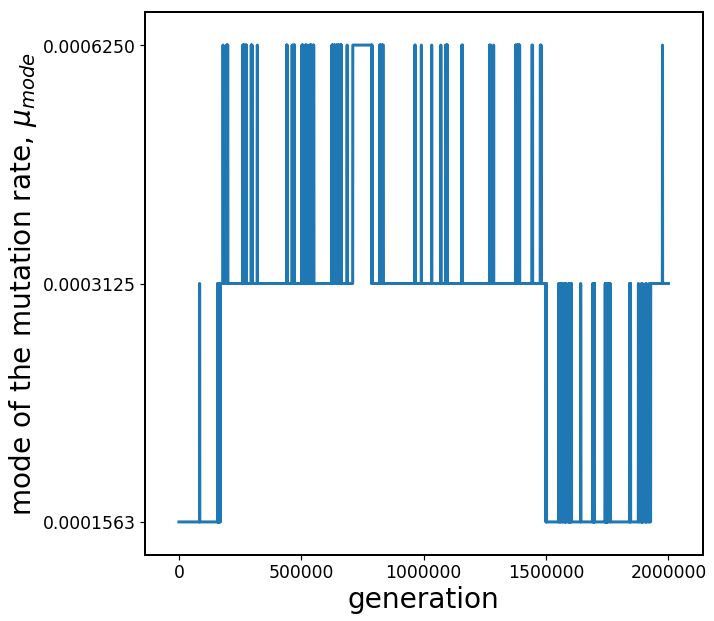

In [81]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plot_mu_trajectory(ax, mu_modes[25600][:2*10**6])
ax.set_xlabel('generation', fontsize=28);
ax.set_ylabel('mode of the mutation rate, $\mu_{mode}$', fontsize=28);
plt.savefig('mu_mode_trajectoryK25600.pdf')

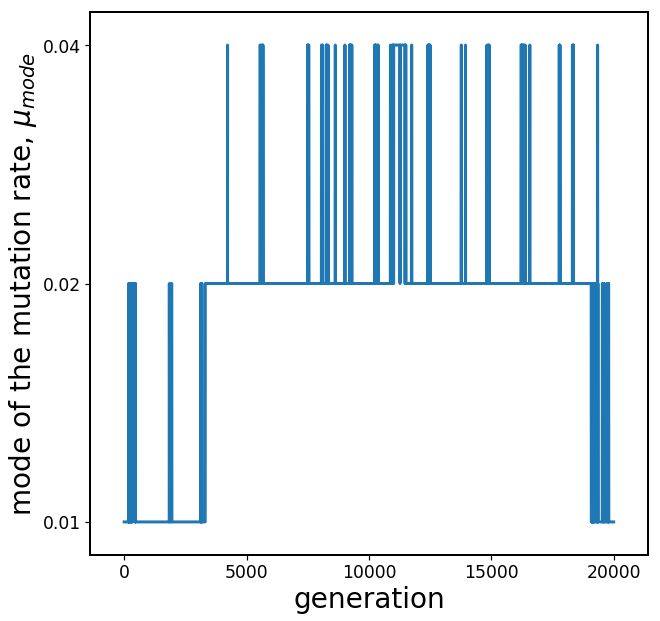

In [82]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plot_mu_trajectory(ax, mu_modes[400][:2*10**4])
ax.set_xlabel('generation', fontsize=28);
ax.set_ylabel('mode of the mutation rate, $\mu_{mode}$', fontsize=28);
plt.savefig('mu_mode_trajectoryK400.pdf')

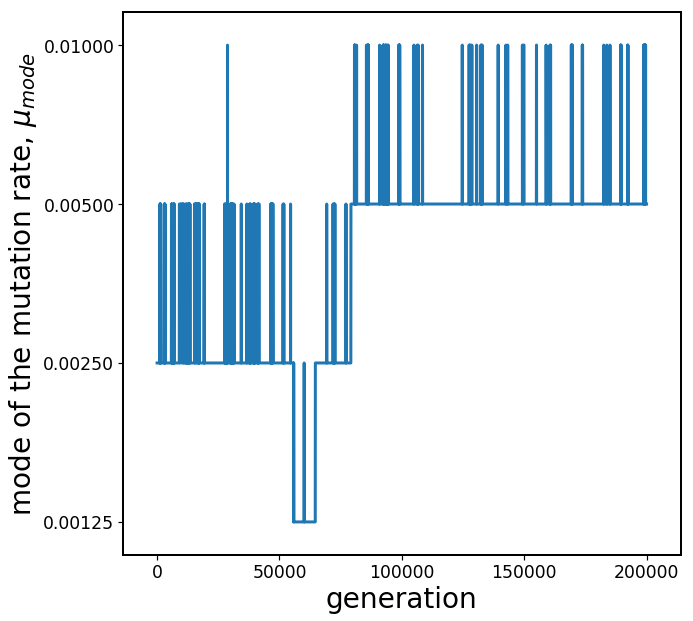

In [83]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plot_mu_trajectory(ax, mu_modes[1600][:2*10**5])
ax.set_xlabel('generation', fontsize=28);
ax.set_ylabel('mode of the mutation rate, $\mu_{mode}$', fontsize=28);
plt.savefig('mu_mode_trajectoryK1600.pdf')

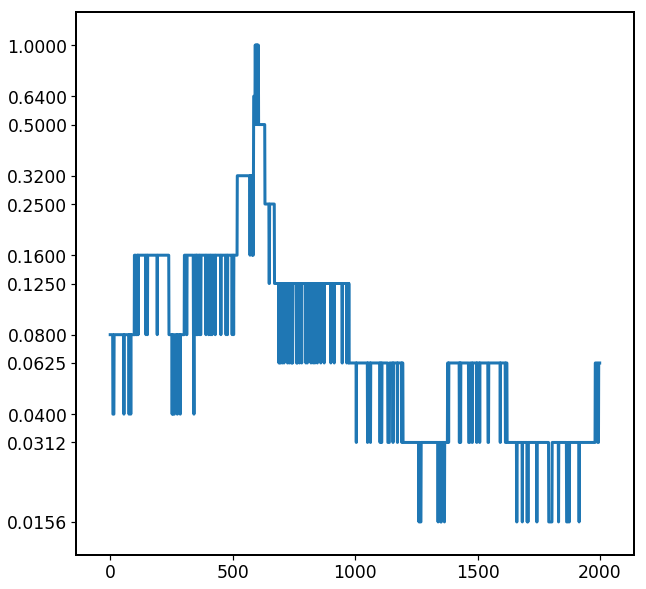

In [8]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plot_mu_trajectory(ax, mu_mins[200][355*10**4:357*10**4:10])

Somewhere between 3.55 million and 3.57 million, all mutation rates were lost below 1, and the simulation for N=200 lost the original mutation rates it worked with. I'll have to cutoff its data before this point. The rest of the runs are fine.

In [56]:
mu_mins[200]=mu_mins[200][:3*10**6]
mu_modes[200]=mu_modes[200][:3*10**6]
f_modes[200]=f_modes[200][:3*10**6]
f_maxes[200]=f_maxes[200][:3*10**6]

# The distribution of mutation rate modes as a function of population size

In [10]:
def mus_to_mudist(mus):
    mus_v = np.unique(mus)
    mudist = np.zeros_like(mus_v,dtype='int64')
    for i, mu in enumerate(mus_v):
        mudist[i] = np.sum(mus==mu)
    return mus_v, mudist/np.sum(mudist)

def mean_mode_mu(mus_v, mudist):
    return np.sum(mus_v*mudist)

In [15]:
mu_dists = OrderedDict()
for K in Ks:
    mu_dists[K] = mus_to_mudist(mu_modes[K])

In [29]:
def bar_plot_mudist(ax, mudist):
    mus_v = mudist[0]
    prob = mudist[1]
    ind = np.arange(mus_v.size)
    ax.bar(ind, prob)
    ax.set_xticks(ind);
    ax.set_xticklabels(['{:.2g}'.format(mu) for mu in mus_v], rotation=0);

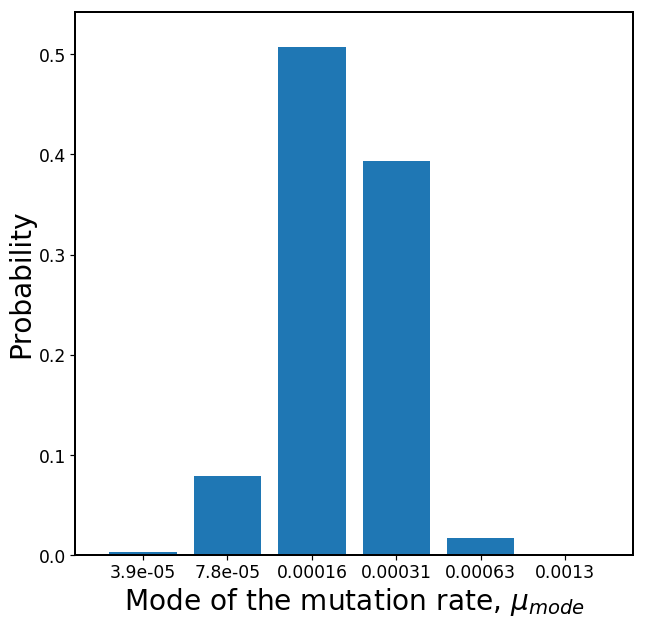

In [84]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
bar_plot_mudist(ax, mu_dists[25600])
ax.set_xlabel('Mode of the mutation rate, $\mu_{mode}$', fontsize=28)
ax.set_ylabel('Probability', fontsize=28)
plt.savefig('db_mu_mode_distK25600.pdf')

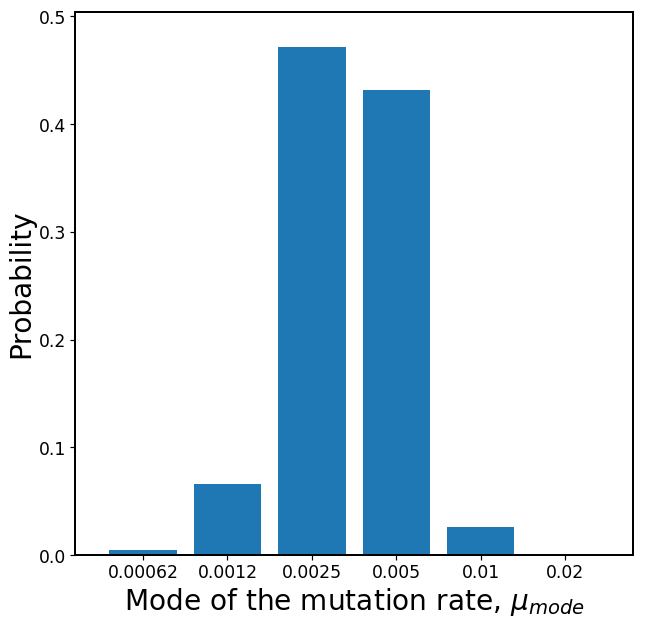

In [85]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
bar_plot_mudist(ax, mu_dists[1600])
ax.set_xlabel('Mode of the mutation rate, $\mu_{mode}$', fontsize=28)
ax.set_ylabel('Probability', fontsize=28)
plt.savefig('db_mu_mode_distK1600.pdf')

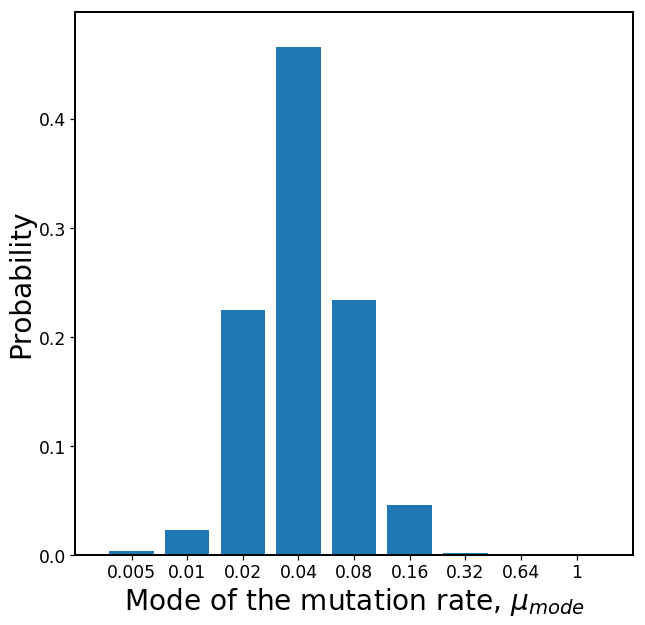

In [86]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
bar_plot_mudist(ax, mu_dists[200])
ax.set_xlabel('Mode of the mutation rate, $\mu_{mode}$', fontsize=28)
ax.set_ylabel('Probability', fontsize=28)
plt.savefig('db_mu_mode_distK200.pdf')

# The mode of the mode of the mutation rate as a function of population size

In [12]:
mu_mode_modes = [spstats.mode(mu_modes[K])[0] for K in Ks]

The multiplier in the formula for the most common mutation rate in the drift barrier scenario for p_a = 1/257 and M = 2 is

In [13]:
np.log(256)/(2*np.log(2))

4.0

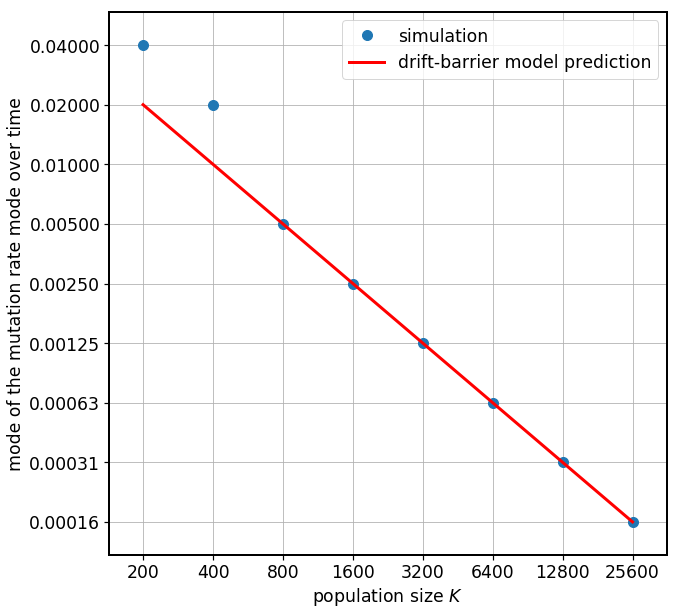

In [14]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.loglog(Ks, mu_mode_modes, linestyle='', label='simulation')
ax.plot(Ks, 4/np.array(Ks), marker='', color='red', label='drift-barrier model prediction')
ax.set_xlabel('population size $K$')
ax.set_ylabel('mode of the mutation rate mode over time')
ax.legend(fontsize='xx-large')
ax.minorticks_off();
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter());
ax.set_yticks(.04/2**np.arange(9));
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter());
ax.set_xticks(200*2**np.arange(8));
ax.grid(True)
plt.savefig('drift_barrier_scaling.pdf')

# The mutation rate landscape catastrophe

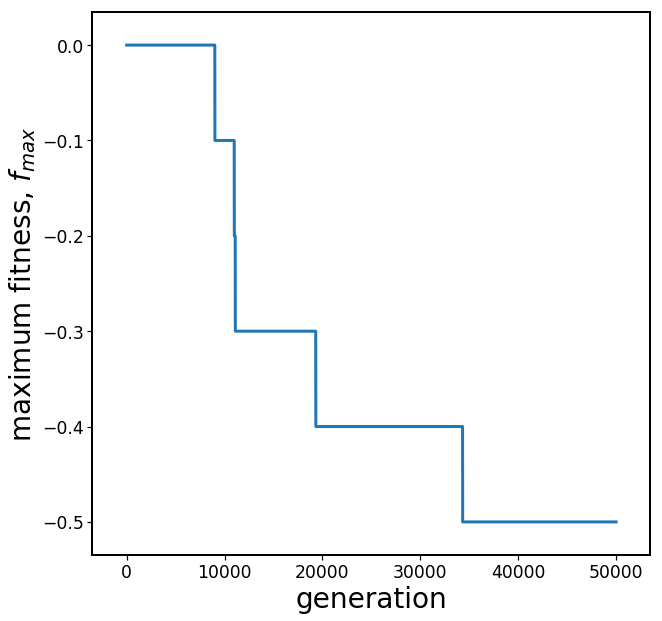

In [87]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.plot(f_maxes[200][:5*10**4],marker='')
ax.set_xlabel('generation', fontsize=28)
ax.set_ylabel('maximum fitness, $f_{max}$', fontsize=28);
plt.savefig('fitness_catastrophe.pdf')

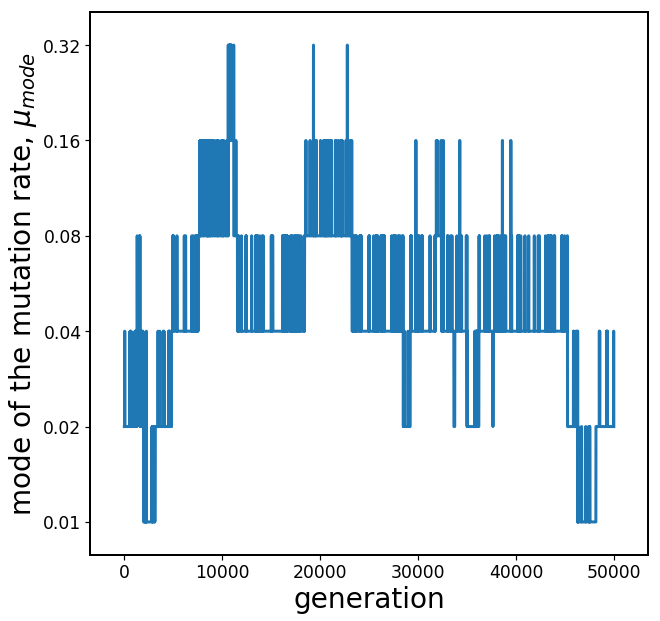

In [88]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plot_mu_trajectory(ax, mu_modes[200][:5*10**4])
ax.set_xlabel('generation', fontsize=28);
ax.set_ylabel('mode of the mutation rate, $\mu_{mode}$', fontsize=28);
plt.savefig('mutation_rate_during_catastrophe.pdf')

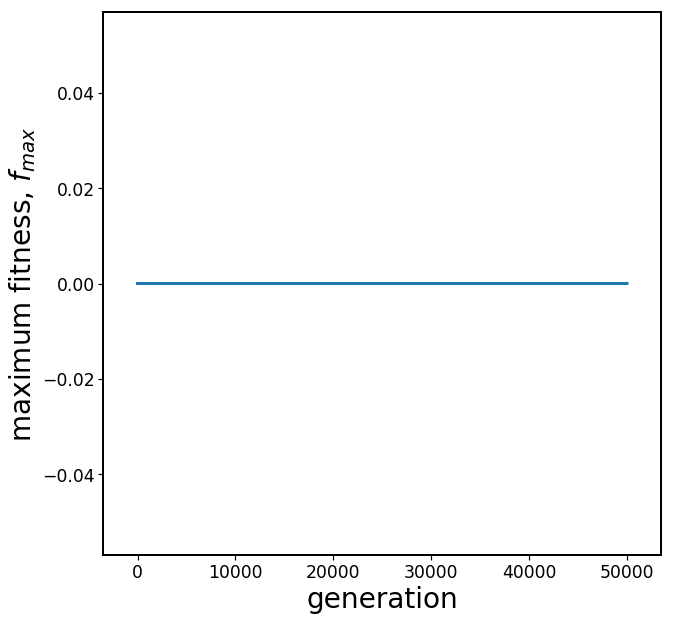

In [89]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.plot(f_maxes[400][:5*10**4],marker='')
ax.set_xlabel('generation', fontsize=28)
ax.set_ylabel('maximum fitness, $f_{max}$', fontsize=28);
plt.savefig('fitness_not_catastrophe.pdf')

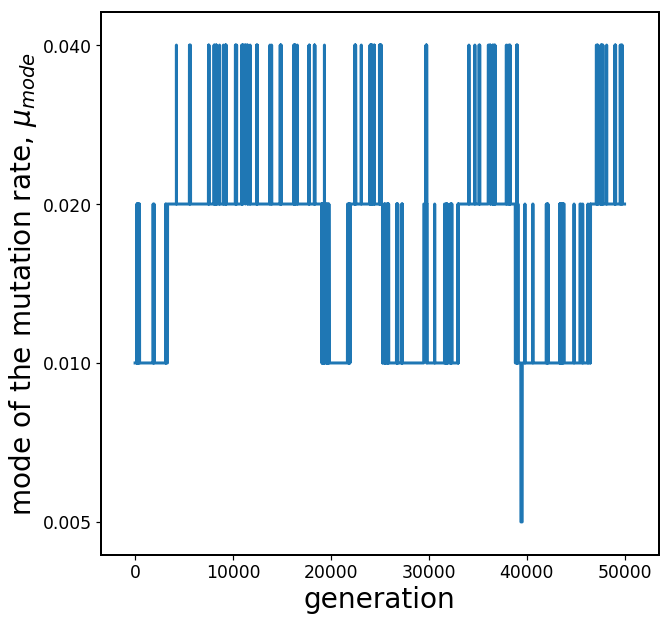

In [90]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plot_mu_trajectory(ax, mu_modes[400][:5*10**4])
ax.set_xlabel('generation', fontsize=28);
ax.set_ylabel('mode of the mutation rate, $\mu_{mode}$', fontsize=28);
plt.savefig('mutation_rate_not_catastrophe.pdf')

In [75]:
drift_runs[200].delta_fitness

0.1

In [76]:
drift_runs[200].mu_multiple

2

In [77]:
drift_runs[200].fraction_accurate

0.0038910505836575876

In [78]:
drift_runs[200].fraction_mu2mu

0.3